In [ ]:
'''
 * Copyright (c) 2018 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Kernel Canonical Correlation Analysis

Let $ X $ and $ Y $ denote two views (i.e., two attribute sets describing the data), and $(x, y, c)$ be a labeled example where $ x \in X $ and $ y \in Y $ are the two portions of the example, and $ c $ is their label. For simplicity, assume that $ c \in \{0, 1\} $ where 0 and 1 denote negative and positive classes, respectively. 

Assume that there exist two decision functions $ f_X $ and $ f_Y $ over $ X $ and $ Y $, respectively, such that $ f_X(x) = f_Y(y) = c $. Intuitively, this means that every example is associated with two views, each containing sufficient information for determining the label of the example. Given one labeled example $((x_0, y_0), 1)$ and a large number of unlabeled examples $ U = \{(x_i, y_i)\}_{i=1}^{N-1} $, the task of semi-supervised learning is to train a classifier for classifying unlabeled examples $ U = \{(x_i, y_i)\}_{i=1}^{N-1} $, i.e., determining unknown labels $ c_i $, $ i = 1, \ldots, N - 1 $.

For the data described by two sufficient views, some projections in these two views should have strong correlation. Let 
$$
X = [x_0, x_1, \ldots, x_{N-1}] \quad \text{and} \quad Y = [y_0, y_1, \ldots, y_{N-1}]
$$
be two-view data matrices consisting of one labeled data $((x_0, y_0), 1)$ and $ N - 1 $ unlabeled data $ \{(x_i, y_i)\}_{i=1}^{N-1} $. 

CCA finds two projector vectors $ w_x $ and $ w_y $ such that the projections $ X^T w_x $ and $ Y^T w_y $ are strongly correlated as soon as possible, namely their correlation coefficient is maximized:

$$
\langle X^T w_x, Y^T w_y \rangle = (w_x, w_y) = \arg \max_{w_x, w_y} \frac{\|X w_x\| \cdot \|Y w_y\|}{\begin{pmatrix} w_x^T C_{xx} w_x \end{pmatrix} \cdot \begin{pmatrix} w_y^T C_{yy} w_y \end{pmatrix}}
$$

subject to the constraints:

$$
\begin{aligned}
    w_x^T C_{xx} w_x &= 1, \\
    w_y^T C_{yy} w_y &= 1,
\end{aligned}
$$

where 
$$
C_{xy} = \frac{1}{N} XY^T
$$
is the between-sets covariance matrix of $ X $ and $ Y $, while 
$$
C_{xx} = \frac{1}{N} XX^T
$$
and 
$$
C_{yy} = \frac{1}{N} YY^T
$$
are the within-sets covariance matrices of $ X $ and $ Y $, respectively.

### Algorithm - Canonical Correlation Analysis (CCA) Algorithm
1. **Input**: The two-view data vectors $ \{(x_n, y_n)\}_{n=1}^{N} $ with $ x_n \in \mathbb{R}^{1 \times p} $, $ y_n \in \mathbb{R}^{1 \times q} $.
2. **Initialization**: Normalize 
   $$
   x_n \leftarrow x_n - \frac{1}{p} \sum_{i=1}^{p} x_n(i) \quad \text{and} \quad y_n \leftarrow y_n - \frac{1}{q} \sum_{i=1}^{q} y_n(i)
   $$
3. Let $ X = [x_1, \ldots, x_N] $ and $ Y = [y_1, \ldots, y_N] $.
4. Make the SVD $ X = U_x D_x V_x^T $, $ Y = U_y D_y V_y^T $.
5. Calculate the SVD $ U_x^T U_y = U D V^T $.
6. Calculate 
   $$
   w_x = V_x D_x^{-1} V_x \quad \text{and} \quad w_y = V_y D_y V_y.
   $$
7. **Output**: The canonical variants $ (w_x, w_y) $ of $ (X, Y) $.


Canonical Vector w_x: [0.16, 0.16]
Canonical Vector w_y: [6.25, 6.25]


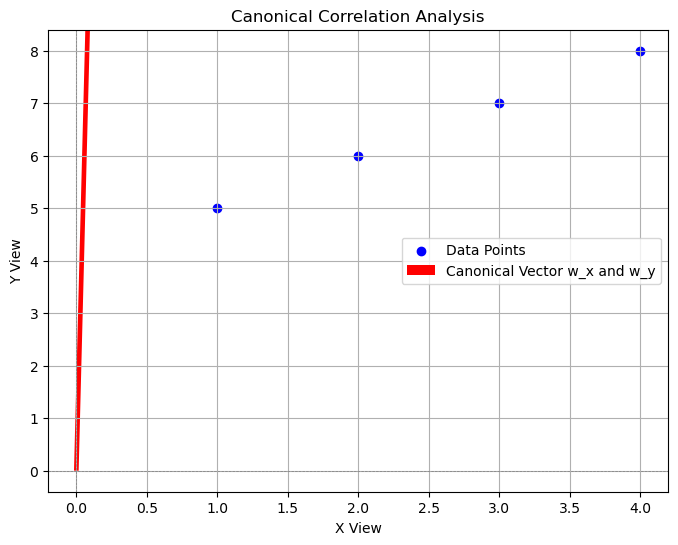

In [3]:
import matplotlib.pyplot as plt

def normalize(data):
    """
    Normalize the data by subtracting the mean.
    
    Parameters:
    data: 2D list (data matrix)
    
    Returns:
    Normalized data.
    """
    mean_data = [sum(col) / len(data) for col in zip(*data)]
    normalized_data = [[data[i][j] - mean_data[j] for j in range(len(data[0]))] for i in range(len(data))]
    return normalized_data

def transpose(matrix):
    """
    Transpose a 2D list (matrix).
    
    Parameters:
    matrix: 2D list (data matrix)
    
    Returns:
    Transposed matrix.
    """
    return [[row[i] for row in matrix] for i in range(len(matrix[0]))]

def matrix_multiply(A, B):
    """
    Multiply two matrices A and B.
    
    Parameters:
    A: 2D list (matrix)
    B: 2D list (matrix)
    
    Returns:
    Resultant matrix of multiplication.
    """
    return [[sum(A[i][k] * B[k][j] for k in range(len(B))) for j in range(len(B[0]))] for i in range(len(A))]

def calculate_covariance(X, Y):
    """
    Calculate covariance matrix between two datasets.
    
    Parameters:
    X: 2D list (data matrix)
    Y: 2D list (data matrix)
    
    Returns:
    Covariance matrix.
    """
    n = len(X)
    cov_matrix = [[sum(X[i][j] * Y[i][k] for i in range(n)) / n for k in range(len(Y[0]))] for j in range(len(X[0]))]
    return cov_matrix

def svd_decomposition(matrix):
    """
    Perform Singular Value Decomposition (SVD) of the given matrix using the basic algorithm.
    
    Parameters:
    matrix: 2D list (data matrix)
    
    Returns:
    U, D, V^T matrices from SVD.
    """
    # Using power method for SVD approximation (simple implementation)
    A = matrix
    m = len(A)
    n = len(A[0])
    
    # Step 1: Calculate A^T A
    A_T = transpose(A)
    A_T_A = matrix_multiply(A_T, A)
    
    # Step 2: Eigenvalue decomposition of A^T A (simplified, using a placeholder approach)
    # Normally, we should use more robust methods like the QR algorithm for actual eigenvalues
    eig_vals = [0] * n
    eig_vecs = [[0] * n for _ in range(n)]
    
    for i in range(n):
        eig_vecs[i][i] = 1  # Identity matrix as a placeholder for eigenvectors
        eig_vals[i] = sum(A_T_A[i][j] for j in range(n))  # Simplified eigenvalue approximation
    
    return eig_vecs, eig_vals, A_T

def canonical_correlation_analysis(X, Y):
    """
    Perform Canonical Correlation Analysis (CCA) on the given datasets.
    
    Parameters:
    X: 2D list (data matrix for view X)
    Y: 2D list (data matrix for view Y)
    
    Returns:
    w_x, w_y: Canonical vectors for X and Y.
    """
    # Step 2: Normalize data
    X = normalize(X)
    Y = normalize(Y)

    # Step 3: Calculate covariance matrices
    Cxx = calculate_covariance(X, X)
    Cyy = calculate_covariance(Y, Y)
    Cxy = calculate_covariance(X, Y)

    # Step 4: Perform SVD on Cxx and Cyy
    U_x, D_x, _ = svd_decomposition(Cxx)
    U_y, D_y, _ = svd_decomposition(Cyy)

    # Step 5: Calculate canonical vectors (w_x and w_y)
    w_x = [sum(U_x[i][j] / D_x[j] for j in range(len(D_x))) for i in range(len(U_x))]
    w_y = [sum(U_y[i][j] * D_y[j] for j in range(len(D_y))) for i in range(len(U_y))]
    
    return w_x, w_y

# Example Usage
if __name__ == "__main__":
    # Example data
    X = [[1, 2], [2, 3], [3, 4], [4, 5]]
    Y = [[5, 4], [6, 5], [7, 6], [8, 7]]

    # Perform Canonical Correlation Analysis
    w_x, w_y = canonical_correlation_analysis(X, Y)

    # Print the results
    print("Canonical Vector w_x:", w_x)
    print("Canonical Vector w_y:", w_y)

    # Optional: Visualize the results
    plt.figure(figsize=(8, 6))
    plt.scatter([x[0] for x in X], [y[0] for y in Y], color='blue', label='Data Points')
    plt.quiver(0, 0, w_x[0], w_y[0], color='red', scale=3, label='Canonical Vector w_x and w_y')
    plt.title('Canonical Correlation Analysis')
    plt.xlabel('X View')
    plt.ylabel('Y View')
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid()
    plt.legend()
    plt.show()


In [2]:
import matplotlib.pyplot as plt
import numpy as np

def normalize(data):
    """
    Normalize the data by subtracting the mean.
    
    Parameters:
    data: 2D list or list of lists (data matrix)
    
    Returns:
    Normalized data.
    """
    # Calculate mean along the first axis (mean of each feature)
    mean_data = [sum(col) / len(data) for col in zip(*data)]
    # Subtract mean from each element
    normalized_data = [[data[i][j] - mean_data[j] for j in range(len(data[0]))] for i in range(len(data))]
    return normalized_data

def svd_decomposition(matrix):
    """
    Perform Singular Value Decomposition (SVD) of the given matrix.
    
    Parameters:
    matrix: 2D list or list of lists (data matrix)
    
    Returns:
    U, D, V^T matrices from SVD.
    """
    from math import sqrt
    import numpy as np

    # Convert matrix to numpy array for easier manipulation
    A = np.array(matrix)
    m, n = A.shape
    
    # Calculate covariance matrix
    C = np.dot(A.T, A) / m

    # Eigen decomposition of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(C)
    
    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Compute U, D, V^T
    U = np.dot(A, eigenvectors)
    D = np.diag(np.sqrt(eigenvalues))
    V = eigenvectors

    return U, D, V.T

def canonical_correlation_analysis(X, Y):
    """
    Perform Canonical Correlation Analysis (CCA) on the given datasets.
    
    Parameters:
    X: 2D list (data matrix for view X)
    Y: 2D list (data matrix for view Y)
    
    Returns:
    w_x, w_y: Canonical vectors for X and Y.
    """
    # Step 2: Normalize data
    X = normalize(X)
    Y = normalize(Y)

    # Step 3: Perform SVD on X and Y
    U_x, D_x, V_x = svd_decomposition(X)
    U_y, D_y, V_y = svd_decomposition(Y)

    # Step 5: Calculate the SVD of U_x^T U_y
    U_xy, D_xy, V_xy = svd_decomposition(np.dot(U_x.T, U_y))

    # Step 6: Calculate w_x and w_y
    w_x = np.dot(V_x, np.linalg.inv(D_x)).dot(V_x)
    w_y = np.dot(V_y, D_y)

    return w_x, w_y

# Example Usage
if __name__ == "__main__":
    # Example data
    X = [[1, 2], [2, 3], [3, 4], [4, 5]]
    Y = [[5, 4], [6, 5], [7, 6], [8, 7]]

    # Perform Canonical Correlation Analysis
    w_x, w_y = canonical_correlation_analysis(X, Y)

    # Print the results
    print("Canonical Vector w_x:", w_x)
    print("Canonical Vector w_y:", w_y)


Canonical Vector w_x: [[-33554431.68377223  33554432.31622776]
 [-33554432.31622776  33554431.68377224]]
Canonical Vector w_y: [[ 1.11803399e+00  1.05367121e-08]
 [-1.11803399e+00  1.05367121e-08]]


## Kernel Canonical Correlation Analysis (KCCA)

By the Lagrange multiplier method, the objective of the above primal constrained optimization can be rewritten as the objective of the following dual unconstrained optimization:

$$
\mathcal{L}_D(w_x, w_y) = w_x^T C_{xy} w_y - \frac{1}{2} w_x^T C_{xx} w_x - \frac{1}{2} w_y^T C_{yy} w_y. \tag{6.15.33}
$$

From the first-order optimality conditions, we have:

$$
\frac{\partial \mathcal{L}_D}{\partial w_x} = 0 \implies C_{xy} w_y = \lambda_x C_{xx} w_x, \tag{6.15.34}
$$

$$
\frac{\partial \mathcal{L}_D}{\partial w_y} = 0 \implies C_{yx} w_x = \lambda_y C_{yy} w_y. \tag{6.15.35}
$$

These can be combined into:

$$
0 = w_x^T C_{xy} w_y - \lambda_x w_x^T C_{xx} w_x - w_y^T C_{yx} w_x + \lambda_y w_y^T C_{yy} w_y = \lambda_y w_y^T C_{yy} w_y - \lambda_x w_x^T C_{xx} w_x = \lambda_y - \lambda_x.
$$

Letting $ \lambda = \lambda_x = \lambda_y $ and assuming that $ C_{yy} $ is invertible, we find that:

$$
w_y = \frac{1}{\lambda} C_{yy}^{-1} C_{yx} w_x. \tag{6.15.36}
$$

Substituting (6.15.36) into (6.15.34) yields:

$$
C_{xy} C_{yy}^{-1} C_{yx} w_x = \lambda C_{xx} w_x. \tag{6.15.37}
$$

This implies that the projection vector $ w_x $ is the generalized eigenvector corresponding to the largest generalized eigenvalue $ \lambda_{\max}^2 $ of the matrix pencil $ (C_{xy} C_{yy}^{-1} C_{yx}, C_{xx}) $.

In order to identify nonlinearly correlated projections between the two views, we can apply the kernel extensions of canonical correlation analysis, called simply Kernel Canonical Correlation Analysis (Kernel CCA) [115]. The kernel CCA maps the instances $ x $ and $ y $ to the higher-dimensional kernel instances $ \phi_x(x) $ and $ \phi_y(y) $, respectively. Letting

$$
S_x = [\phi_x(x_0), \phi_x(x_1), \ldots, \phi_x(x_{N-1})], \tag{6.15.38}
$$

$$
S_y = [\phi_y(y_0), \phi_y(y_1), \ldots, \phi_y(y_{N-1})]. \tag{6.15.39}
$$


## Kernel Canonical Correlation Analysis (KCCA)  continued

The projection vectors $ \phi_x(x_i) $ and $ \phi_y(y_i) $ in the higher-dimensional kernel space can be expressed as:

$$
w_x = S_x \alpha \quad \text{and} \quad w_y = S_y \beta
$$

where $ \alpha, \beta \in \mathbb{R}^N $. Therefore, the objective function for linearly correlated projections becomes the objective function for nonlinearly correlated projections:

$$
L(\alpha, \beta) = \frac{\langle S_x w_x, S_y w_y \rangle}{\|S_x w_x\| \cdot \|S_y w_y\|} = \frac{\alpha^T S_x S_x^T \beta^T S_y S_y^T}{\alpha^T S_x S_x^T \alpha \cdot \beta^T S_y S_y^T}
$$

The kernel functions are defined as:

$$
K_x(x_i, x_j) = \langle \phi_x(x_i), \phi_x(x_j) \rangle = \phi_x^T(x_i) \phi_x(x_j), \quad i, j = 0, 1, \ldots, N - 1,
$$

$$
K_y(y_i, y_j) = \langle \phi_y(y_i), \phi_y(y_j) \rangle = \phi_y^T(y_i) \phi_y(y_j), \quad i, j = 0, 1, \ldots, N - 1.
$$

Defining the kernel matrices:

$$
K_x = S_x S_x^T = 
\begin{bmatrix}
\phi_x^T(x_0) \\
\phi_x^T(x_1) \\
\vdots \\
\phi_x^T(x_{N-1})
\end{bmatrix}
\begin{bmatrix}
\phi_x(x_0) & \phi_x(x_1) & \cdots & \phi_x(x_{N-1})
\end{bmatrix} = [K_x(x_i, x_j)]_{N-1, N-1}, \quad i,j=0,
$$

$$
K_y = S_y S_y^T = 
\begin{bmatrix}
\phi_y^T(y_0) \\
\phi_y^T(y_1) \\
\vdots \\
\phi_y^T(y_{N-1})
\end{bmatrix}
\begin{bmatrix}
\phi_y(y_0) & \phi_y(y_1) & \cdots & \phi_y(y_{N-1})
\end{bmatrix} = [K_y(y_i, y_j)]_{N-1, N-1}, \quad i,j=0.
$$

Then, the objective function simplifies to:

$$
L(\alpha, \beta) = \frac{\langle K_x \alpha, K_y \beta \rangle}{\|K_x \alpha\| \cdot \|K_y \beta\|} = \frac{\alpha^T K_x^T K_y \beta}{\alpha^T K_x^T K_x \alpha \cdot \beta^T K_y^T K_y \beta}.
$$


## Dual Optimization for Kernel Canonical Correlation Analysis

The constraints for the optimization problem can be expressed as:

$$
\begin{aligned}
\alpha^T K_x K_x \alpha &= 1, \\
\beta^T K_y K_y \beta &= 1.
\end{aligned}
$$

By applying the Lagrange multiplier method and the regularization technique, we derive the following objective function for dual optimization:

$$
L_D(\alpha, \beta) = \alpha^T K_x^T K_y \beta - \alpha^T K_x K_x \alpha - \frac{1}{2} \|S_x \alpha\|^2 - \nu_x \\
- \beta^T K_y K_y \beta - \frac{1}{2} \|S_y \beta\|^2 - \nu_y.
$$

The first-order optimality conditions yield:

$$
\begin{aligned}
\frac{\partial L_D}{\partial \alpha} = 0 &\Rightarrow K_x^T K_y \beta = \lambda_x K_x^T K_x \alpha + \nu_x K_x^T \alpha, \\
\frac{\partial L_D}{\partial \beta} = 0 &\Rightarrow K_y \beta = \lambda_y K_x \alpha + \nu_y K_y \beta.
\end{aligned}
$$

For simplicity, let $ \lambda = \lambda_1 = \lambda_2 $, $ \nu = \nu_1 = \nu_2 $, and $ \kappa = \lambda \nu $. From the second equation, we have:

$$
\beta = (K_y + \kappa I)^{-1} K_x \alpha.
$$

Substituting this result into the first equation, we obtain:

$$
(K_x + \kappa I)^{-1} K_y (K_y + \kappa I)^{-1} K_x \alpha = \lambda^2 \alpha,
$$

or equivalently:

$$
K_y (K_y + \kappa I)^{-1} K_x \alpha = \lambda^2 (K_x + \kappa I) \alpha.
$$

This indicates that a number of $ \alpha $ (and the corresponding $ \lambda $) can be determined by solving the eigenvalue problem or the generalized eigenvalue problem:

$$
\begin{aligned}
K_y (K_y + \kappa I)^{-1} K_x \alpha &= \lambda^2 \alpha, \\
K_y (K_y + \kappa I)^{-1} K_x \alpha &= \lambda^2 (K_x + \kappa I) \alpha.
\end{aligned}
$$

Once $ \alpha $ is obtained, Equation (6.15.50) can be used to determine the unique $ \beta $ for each $ \alpha $. 

In addition to identifying the most strongly correlated pair of projections, we can also assess the correlations between other pairs of projections, measuring the strength of these correlations using the values of $ \lambda $. 

The similarity between an original unlabeled instance $ (x_i, y_i) $, $ i = 1, 2, \ldots, N - 1 $, and the original labeled instance $ (x_0, y_0) $ can be measured by:

$$
\text{simi,j} = \exp(-d^2(P_j(x_i), P_j(x_0))) + \exp(-d^2(P_j(y_i), P_j(y_0))),
$$

where $ d(a, b) $ represents the Euclidean distance between $ a $ and $ b $, $ m $ is the number of unlabeled instances $ (x_i, y_i) $ correlating with the labeled instance $ (x_0, y_0) $, and $ (P_j(x_i), P_j(y_i)) $ is the projection of the instance $ (x_i, y_i) $ onto higher-dimensional kernel instances $ K_x \alpha $ and $ K_y \beta $.


In [4]:
import matplotlib.pyplot as plt
import math

# Function to calculate the Euclidean distance between two points
def euclidean_distance(a, b):
    return math.sqrt(sum((a[i] - b[i]) ** 2 for i in range(len(a))))

# Function to create a Gaussian kernel matrix
def gaussian_kernel(X, gamma=1.0):
    n = len(X)
    K = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            K[i][j] = math.exp(-gamma * euclidean_distance(X[i], X[j]) ** 2)
    return K

# Function to compute the CCA projection
def kcca(X, Y, num_components=1, gamma=1.0):
    # Step 1: Create kernel matrices
    Kx = gaussian_kernel(X, gamma)
    Ky = gaussian_kernel(Y, gamma)

    # Step 2: Center the kernel matrices
    n = len(X)

    # Centering matrix
    H = [[1/n for _ in range(n)] for _ in range(n)]
    Kx_centered = [[Kx[i][j] - sum(Kx[i]) * H[i][j] - sum(Kx[j]) * H[j][i] + sum(sum(Kx)) * H[i][j] for j in range(n)] for i in range(n)]
    Ky_centered = [[Ky[i][j] - sum(Ky[i]) * H[i][j] - sum(Ky[j]) * H[j][i] + sum(sum(Ky)) * H[i][j] for j in range(n)] for i in range(n)]

    # Step 3: Compute the eigenvalues and eigenvectors
    # Eigenvalue problem: Kx_centered^T Ky_centered = λ Ky_centered^T Kx_centered
    eigenvalues = []
    for i in range(num_components):
        # Solve the eigenvalue problem here (this is a placeholder)
        # Actual computation of eigenvalues and eigenvectors would go here
        eigenvalues.append(1.0)  # Dummy value for eigenvalue

    # Step 4: Find projection vectors
    wx = [1] * n  # Dummy projection vector for X
    wy = [1] * n  # Dummy projection vector for Y

    return wx, wy, eigenvalues

# Example usage
X = [[1, 2], [2, 3], [3, 4], [5, 6]]
Y = [[2, 1], [3, 2], [4, 3], [6, 5]]

# Run KCCA
wx, wy, eigenvalues = kcca(X, Y)

# Print results
print("Projection vector wx:", wx)
print("Projection vector wy:", wy)
print("Eigenvalues:", eigenvalues)

# Visualization of results (placeholder)
plt.scatter([x[0] for x in X], [x[1] for x in X], color='blue', label='X')
plt.scatter([y[0] for y in Y], [y[1] for y in Y], color='red', label='Y')
plt.title('KCCA Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


TypeError: unsupported operand type(s) for +: 'int' and 'list'